In [1]:
import os
import pickle

import xgboost as xgb
import pandas as pd
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
import shap

# Enter Results Path in the next cell

In [2]:
results_path = "/home/parthsuresh/classical-brute-force-machine/results"

In [3]:
model_path = f"{results_path}/gbm_models/gbm_model.sav"
gbm_model = pickle.load(open(model_path, 'rb'))

In [4]:
train_data = pd.read_csv(f'{results_path}/data/training-dataset-numeric.csv')
validation_data = pd.read_csv(f'{results_path}/data/validation-dataset-numeric.csv')

x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]

In [5]:
gbm_explainer = shap.TreeExplainer(gbm_model)
gbm_shap = gbm_explainer.shap_values(x_train)
gbm_expected = gbm_explainer.expected_value
gbm_shap_interaction = shap.TreeExplainer(gbm_model).shap_interaction_values(x_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


In [6]:
gbm_shap.shape

(2354, 158)

In [7]:
x_train.columns

Index(['L_posteriorcingulate_thickavg', 'R_inferiorparietal_thickavg',
       'L_supramargil_thickavg', 'R_caudalanteriorcingulate_surfavg', 'Ramyg',
       'L_lateralorbitofrontal_thickavg', 'Site_enigma',
       'R_transversetemporal_surfavg', 'R_lingual_thickavg',
       'R_posteriorcingulate_surfavg',
       ...
       'Lcaud', 'L_medialorbitofrontal_thickavg', 'L_postcentral_thickavg',
       'R_bankssts_thickavg', 'L_caudalmiddlefrontal_surfavg',
       'R_fusiform_thickavg', 'R_parsopercularis_surfavg', 'Tesla',
       'R_medialorbitofrontal_thickavg', 'L_entorhil_surfavg'],
      dtype='object', length=158)

# Interaction plots

## Parameters

<b>feature1, feature 2</b>: Features to be plotted in dependency plot. feature1 is x-axis, feature2 is y-axis <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br> 

## Example

shap_interaction_plot(feature1='Lcaud', feature2='Age', save=True)

In [ ]:
def shap_interaction_plot(feature1: str, feature2: str, save: bool = False) -> None:
    '''
    feature1, feature 2: Features to be plotted in dependency plot. feature1 is x-axis, feature2 is y-axis
    save: if True, saves image as png file and displays it. if False, image is displayed, but not saved. False by default
    '''
    if save == False:
        shap.dependence_plot((feature1, feature2), 
                     gbm_shap_interaction, x_train)
    else:
        shap.dependence_plot((feature1, feature2), 
                     gbm_shap_interaction, x_train, show=False)
        plt.tight_layout()
        plt.savefig(f"{results_path}/plots/{feature1}_{feature2}_interaction.png", dpi=400)
        plt.show()

In [ ]:
# Change values of feature1 and feature2

shap_interaction_plot(feature1='Lcaud', feature2='Rcaud', save=True)

# Auto-detected Interaction plots

## Parameters

<b>feature</b>: Feature to be plotted in dependency plot. feature is x-axis <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br> 

## Example

shap_auto_interaction_plot(feature1='Lcaud', save=True)

In [ ]:
def shap_auto_interaction_plot(feature: str, save: bool = False) -> None:
    '''
    feature: Feature to be plotted in dependency plot. feature is x-axis
    save: if True, saves image as png file and displays it. if False, image is displayed, but not saved. False by default
    '''
    shap.dependence_plot(feature, gbm_shap, 
                         x_train, show=False, feature_names = x_train.columns, interaction_index="auto")
    plt.tight_layout()
    if save:
        plt.savefig(f"{results_path}/plots/{feature}_auto_interaction.png", dpi=400)
    plt.show()

In [ ]:
shap_auto_interaction_plot('Lcaud', save=True)

# Summary Bar Plot

## Parameters

<b>max_display</b>: Number of features to be shown <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br>

## Example

shap_summary_bar_plot(max_display=15, save=True)

In [ ]:
def shap_summary_bar_plot(max_display: int = 10, save: bool = False) -> None:
    '''
    max_display: Number of features to be shown. Default: 10
    save: if True, saves image as png file and displays it. if False, image is displayed, but not saved. False by default
    '''
    if save == False:
        shap.summary_plot(gbm_shap, x_train, plot_type="bar", max_display=max_display)
    else:
        shap.summary_plot(gbm_shap, x_train, plot_type="bar", max_display=max_display, show=False)
        plt.tight_layout()
        plt.savefig(f"{results_path}/plots/summary.png", dpi=400)
        plt.show()

In [ ]:
# Change max_display and save values

shap_summary_bar_plot(max_display=15, save=True)

# Summary Dot Plot

## Parameters

<b>max_display</b>: Number of features to be shown <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br>

## Example

shap_summary_dot_plot(max_display=15, save=True)

In [ ]:
def shap_summary_dot_plot(max_display: int = 10, save: bool = False) -> None:
    '''
    max_display: Number of features to be shown. Default: 10
    save: if True, saves image as png file and displays it. if False, image is displayed, but not saved. False by default
    '''
    if save == False:
        shap.summary_plot(gbm_shap, x_train, plot_type="dot", max_display=max_display)
    else:
        shap.summary_plot(gbm_shap, x_train, plot_type="dot", max_display=max_display, show=False)
        plt.tight_layout()
        plt.savefig(f"{results_path}/plots/summary_dot.png", dpi=400)
        plt.show()

In [ ]:
shap_summary_dot_plot(max_display=15, save=True)

# Embedding Plots

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
np.random.seed(0)
shap_pca = PCA(n_components=2).fit_transform(gbm_shap)
raw_pca = PCA(n_components=2).fit_transform(x_train)

# Shap Embedding Plot

## Parameters

<b>Feature</b>: Feature name <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br>

## Example

shap_embedding_plot(feature='Lcaud', save=True)

In [ ]:
def shap_embedding_plot(feature: str, save: bool = False) -> None:
    def embedding_plot(embedding, values, label, alpha=1.0):
        f = plt.figure(figsize=(10,5))
        plt.scatter(embedding[:,0],
                   embedding[:,1],
                   c=values,
                   linewidth=0, alpha=alpha, cmap=shap.plots.colors.red_blue)
        cb = plt.colorbar(label=label, aspect=40, orientation="horizontal")
        cb.set_alpha(1)
        cb.draw_all()
        cb.outline.set_linewidth(0)
        cb.ax.tick_params('x', length=0)
        cb.ax.xaxis.set_label_position('top')
        plt.gca().axis("off")
    columns_list = x_train.columns.tolist()
    embedding_plot(shap_pca, gbm_shap[:,columns_list.index(feature)], feature)
    if save:
        plt.savefig(f"{results_path}/plots/{feature}_embedding.png", dpi=400)
    plt.show()

In [ ]:
shap_embedding_plot(feature='Age', save='True')

# HeatMap


## Parameters

<b>max_display</b>: Number of features to be shown <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br>

## Example

shap_heatmap(max_display=15, save=True)

In [ ]:
import scipy
from scipy.spatial.distance import pdist

def shap_heatmap(max_display: int=15, save=False):

    def hclust_order(X, metric="sqeuclidean"):
        """ A leaf ordering is under-defined, this picks the ordering that keeps nearby samples similar.
        """

        # compute a hierarchical clustering
        D = scipy.spatial.distance.pdist(X, metric)
        cluster_matrix = scipy.cluster.hierarchy.complete(D)

        # merge clusters, rotating them to make the end points match as best we can
        sets = [[i] for i in range(X.shape[0])]
        for i in range(cluster_matrix.shape[0]):
            s1 = sets[int(cluster_matrix[i,0])]
            s2 = sets[int(cluster_matrix[i,1])]

            # compute distances between the end points of the lists
            d_s1_s2 = pdist(np.vstack([X[s1[-1],:], X[s2[0],:]]), metric)[0]
            d_s2_s1 = pdist(np.vstack([X[s1[0],:], X[s2[-1],:]]), metric)[0]
            d_s1r_s2 = pdist(np.vstack([X[s1[0],:], X[s2[0],:]]), metric)[0]
            d_s1_s2r = pdist(np.vstack([X[s1[-1],:], X[s2[-1],:]]), metric)[0]

            # concatenete the lists in the way the minimizes the difference between
            # the samples at the junction
            best = min(d_s1_s2, d_s2_s1, d_s1r_s2, d_s1_s2r)
            if best == d_s1_s2:
                sets.append(s1 + s2)
            elif best == d_s2_s1:
                sets.append(s2 + s1)
            elif best == d_s1r_s2:
                sets.append(list(reversed(s1)) + s2)
            else:
                sets.append(s1 + list(reversed(s2)))

        return sets[-1]


    clustOrder = hclust_order(gbm_shap)

    col_inds = np.argsort(-np.abs(gbm_shap).mean(0))[:max_display]

    gbm_shap_normed = gbm_shap.copy()
    for i in col_inds:
        gbm_shap_normed[:,i] -= gbm_shap_normed[:,i].min()
        gbm_shap_normed[:,i] /= gbm_shap_normed[:,i].max()

    f = plt.figure(figsize=(15,5))
    total = gbm_shap[clustOrder,:].sum(1)
    total -= total.min()
    total /= total.max()
    plt.imshow(np.vstack([total, gbm_shap_normed[clustOrder,:][:,col_inds].T]), aspect=400, cmap=shap.plots.colors.red_blue)
    plt.yticks(np.arange(len(col_inds)+1))
    plt.gca().set_yticklabels(["Log hazard ratio"] + list(np.array(x_train.columns)[col_inds]))
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.xlabel("Individuals ordered by the leaf order of a hierarchical clustering")
    if save:
        plt.savefig(f"{results_path}/plots/heatmap.png", dpi=400)
    plt.show()

In [ ]:
shap_heatmap(max_display=10, save=True)

# Force Plot


## Parameters

<b>data_index</b>: Index of data point <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br>

## Example

shap_force_plot(data_index=15, save=True)

In [18]:
def shap_force_plot(data_index: int = 0, save: bool = False) -> None:
    '''
    data_index: Index of data point. Default: 0
    save: if True, saves image as png file and displays it. if False, image is displayed, but not saved. False by default
    '''
    if save == False:
        shap.force_plot(gbm_expected, gbm_shap[data_index,:], x_train.iloc[data_index,:], matplotlib=True)
    else:
        shap.force_plot(gbm_expected, gbm_shap[data_index,:], x_train.iloc[data_index,:], matplotlib=True, show=False)
#         plt.figure(figsize=(5, 5))
#         #plt.tight_layout()
#         plt.savefig(f"{results_path}/plots/summary_dot_{data_index}.png")
        plt.savefig(f"{results_path}/plots/summary_dot_{data_index}.png",dpi=150, bbox_inches='tight')
        plt.show()

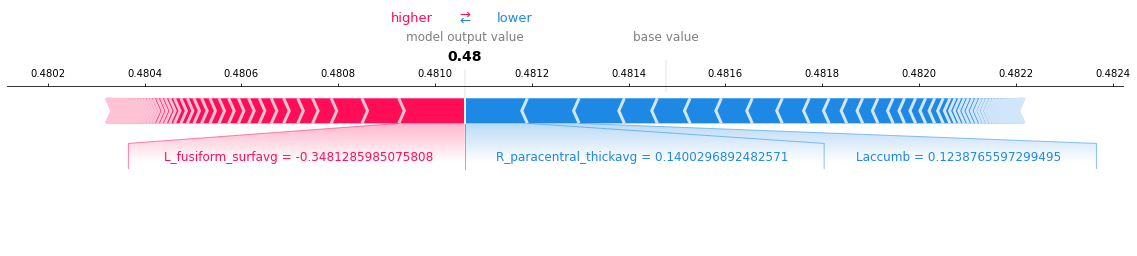

In [20]:
shap_force_plot(data_index=2, save=True)

# Decision Plot


## Parameters

<b>data_index</b>: Index of data point <br>
<b>save</b>: if True, saves image as png file and displays it. if False, image is displayed, but not saved. <b>Default : False</b><br>

## Example

shap_force_plot(data_index=15, save=True)